In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
def intialise_parameters(lenw):
    w = np.random.randn(1,lenw)
    b = 0
    return w,b

In [41]:
def forward_prop(X,w,b):
    z = np.dot(w,X) + b
    return z

In [42]:
def cost_function(z,y,reg_penalty='',penalty_factor=0):
    m = y.shape[1]
    J = (1/(2*m))*np.sum(np.square(z-y),dtype=np.float64)
    penalty=0
    
    if reg_penalty=='L1':
        penalty = penalty_factor * np.sum(np.abs(w))
    elif reg_penalty=='L2':
        penalty =(penalty_factor / (2 * m))  * np.sum(np.square(w))
    
    return J+penalty

In [43]:
def back_prop(X, y, z, reg_penalty="", penalty_factor=0):
    m = y.shape[1]
    dz = (1/m)*(z-y)
    dw = np.dot(dz,X.T)
    if reg_penalty=="L1":
        l1_gradient = penalty_factor * np.sign(w)
        dw += l1_gradient
    elif reg_penalty=="L2":
        l2_gradient = (penalty_factor / m) * w
        dw += l2_gradient
    db = np.sum(dz)
    return dw,db


In [44]:
def gradient_descent_update(w,b,dw,db,learning_rate=0.01):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b

In [45]:
def linear_regresssion_model(X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=50,stop_loss=0.01,metric='RMSE',reg_penalty="",penalty_factor=0):
    X_train=X_train.T
    X_val=X_val.T
    y_train_arr = np.array([y_train])
    y_val_arr=np.array([y_val])
    
    lenw = X_train.shape[0]
    w,b = intialise_parameters(lenw)
    
    costs_train = []
    m_train = y_train_arr.shape[1]
    m_val = y_val_arr.shape[1]
    errors=[]
    error=0
    for i in range(1,epochs+1):
        z_train = forward_prop(X_train,w,b)
        cost_train = cost_function(z_train,y_train_arr,reg_penalty,penalty_factor)
        dw, db = back_prop(X_train,y_train_arr,z_train,reg_penalty,penalty_factor)
        w,b = gradient_descent_update(w,b,dw,db,learning_rate)
        costs_train.append(cost_train)
        if cost_train<stop_loss:
            print('reached stoploss')
            break
        
        z_val = forward_prop(X_val,w,b)    
        
        if metric=="MAE":
            error = (1/m_val)*np.sum(np.abs(z_val - y_val_arr),dtype=np.float64)
        elif metric=="MSE":
            error = (1/m_val)*np.sum(np.square(z_val - y_val_arr),dtype=np.float64)
        elif metric == "RMSE":
            error = np.sqrt((1/m_val) * np.sum(np.square(z_val - y_val_arr),dtype=np.float64),dtype=np.float64) 
        errors.append(error)
    return z_val,y_val_arr,w,b,errors
        

In [46]:
dataset=pd.read_csv('cleaned.csv')
print(dataset.shape)

(4535, 20)


In [47]:
dataset.head()

,Temp_min,Temp_max,DisO2_min,DisO2_max,pH_min,pH_max,Conductivity_min,Conductivity_max,N_min,N_max,Fecal_Col_min,Fecal_Col_max,Total_Coli_min,Total_Coli_max,BOD_avg,Type_RIVER,Type_LAKE,Type_TANK,Type_WETLAND,Type_POND
0,17.0,33.0,5.4,9.2,7.4,8.3,230.0,495.0,0.3,0.77,11000.0,160000.0,28000.0,160000.0,2.15,1,0,0,0,0
1,14.0,29.0,5.2,9.0,7.4,8.2,191.0,520.0,0.3,1.65,2300.0,160000.0,3300.0,160000.0,2.20,1,0,0,0,0
2,10.0,28.0,6.5,10.4,7.2,8.4,191.0,495.0,0.3,0.57,780.0,160000.0,1100.0,160000.0,2.40,1,0,0,0,0
3,14.0,30.0,6.2,10.4,7.1,8.1,190.0,516.0,0.3,1.20,1300.0,35000.0,1700.0,92000.0,1.65,1,0,0,0,0
4,17.0,29.0,2.5,8.9,7.1,7.9,164.0,632.0,0.3,0.49,2700.0,350000.0,2700.0,540000.0,2.70,1,0,0,0,0


In [6]:
dataset.columns

Index(['Temp_min', 'Temp_max', 'DisO2_min', 'DisO2_max', 'pH_min', 'pH_max',
       'Conductivity_min', 'Conductivity_max', 'N_min', 'N_max',
       'Fecal_Col_min', 'Fecal_Col_max', 'Total_Coli_min', 'Total_Coli_max',
       'BOD_avg', 'Type_RIVER', 'Type_LAKE ', 'Type_TANK ', 'Type_WETLAND ',
       'Type_POND '],
      dtype='object')

In [7]:
columns_to_scale = ['Temp_min', 'Temp_max', 'DisO2_min', 'DisO2_max', 'pH_min', 'pH_max',
                    'Conductivity_min', 'Conductivity_max', 'N_min', 'N_max',
                    'Fecal_Col_min', 'Fecal_Col_max', 'Total_Coli_min', 'Total_Coli_max',
                    'Type_RIVER', 'Type_LAKE ', 'Type_TANK ', 'Type_WETLAND ',
                    'Type_POND ']


means = dataset[columns_to_scale].mean()
std_devs = dataset[columns_to_scale].std()
dataset[columns_to_scale] = (dataset[columns_to_scale] - means) / std_devs
dataset.head()

,Temp_min,Temp_max,DisO2_min,DisO2_max,pH_min,pH_max,Conductivity_min,Conductivity_max,N_min,N_max,Fecal_Col_min,Fecal_Col_max,Total_Coli_min,Total_Coli_max,BOD_avg,Type_RIVER,Type_LAKE,Type_TANK,Type_WETLAND,Type_POND
0,-0.517529,0.996945,0.225432,0.652806,0.499361,0.420075,-0.182174,-0.199025,-0.289244,-0.320066,0.709632,-0.035708,0.078226,-0.048961,2.15,0.928565,-0.604883,-0.330636,-0.098971,-0.308424
1,-1.073343,0.108608,0.141039,0.576126,0.499361,0.217459,-0.208811,-0.194658,-0.289244,-0.255167,0.029299,-0.035708,-0.034741,-0.048961,2.20,0.928565,-0.604883,-0.330636,-0.098971,-0.308424
2,-1.814429,-0.113477,0.689593,1.112884,0.153665,0.622692,-0.208811,-0.199025,-0.289244,-0.334816,-0.089564,-0.035708,-0.044803,-0.048961,2.40,0.928565,-0.604883,-0.330636,-0.098971,-0.308424
3,-1.073343,0.330692,0.563004,1.112884,-0.019183,0.014843,-0.209494,-0.195357,-0.289244,-0.288354,-0.048900,-0.038442,-0.042059,-0.049271,1.65,0.928565,-0.604883,-0.330636,-0.098971,-0.308424
4,-0.517529,0.108608,-0.998264,0.537787,-0.019183,-0.390390,-0.227251,-0.175092,-0.289244,-0.340716,0.060579,-0.031553,-0.037485,-0.047226,2.70,0.928565,-0.604883,-0.330636,-0.098971,-0.308424


In [8]:
y=dataset['BOD_avg']
y.describe()

count    4535.000000
mean        6.734535
std        14.160878
min         0.200000
25%         1.600000
50%         2.500000
75%         5.500000
max       232.000000
Name: BOD_avg, dtype: float64

In [9]:
X=dataset.drop(columns=['BOD_avg'])
X.describe()

,Temp_min,Temp_max,DisO2_min,DisO2_max,pH_min,pH_max,Conductivity_min,Conductivity_max,N_min,N_max,Fecal_Col_min,Fecal_Col_max,Total_Coli_min,Total_Coli_max,Type_RIVER,Type_LAKE,Type_TANK,Type_WETLAND,Type_POND
count,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03
mean,6.774968e-15,4.468017e-15,2.308203e-14,1.420659e-14,2.569850e-14,-1.784637e-14,-2.503235e-16,-3.584600e-16,-1.315133e-14,2.492469e-15,2.943560e-17,5.112748e-17,5.969162e-16,1.311703e-16,3.756789e-15,2.746890e-15,8.437573e-15,3.346153e-16,-8.164117e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.667143e+00,-6.309634e+00,-2.053175e+00,-2.836118e+00,-1.229140e+01,-1.072382e+01,-3.392612e-01,-2.846259e-01,-4.181823e-01,-3.768532e-01,-1.504811e-01,-3.920721e-02,-4.983413e-02,-4.969108e-02,-1.076693e+00,-6.048828e-01,-3.306362e-01,-9.897076e-02,-3.084236e-01
25%,-5.175287e-01,-5.576459e-01,-4.919070e-01,-3.823691e-01,-3.648794e-01,-5.930062e-01,-2.368132e-01,-2.299465e-01,-2.892438e-01,-3.141664e-01,-1.502465e-01,-3.920632e-02,-4.961460e-02,-4.968999e-02,-1.076693e+00,-6.048828e-01,-3.306362e-01,-9.897076e-02,-3.084236e-01
50%,3.828566e-02,1.086075e-01,2.254323e-01,3.936894e-02,4.984395e-02,1.484266e-02,-1.616846e-01,-1.826042e-01,-2.806479e-01,-2.278797e-01,-1.452418e-01,-3.919389e-02,-4.832485e-02,-4.968378e-02,9.285649e-01,-6.048828e-01,-3.306362e-01,-9.897076e-02,-3.084236e-01
75%,7.793715e-01,5.527765e-01,7.317895e-01,4.227672e-01,4.993609e-01,6.226915e-01,-8.649839e-03,-5.490228e-02,-1.205260e-02,-8.106847e-03,-8.956394e-02,-3.883543e-02,-3.565600e-02,-4.927103e-02,9.285649e-01,1.652848e+00,-3.306362e-01,-9.897076e-02,-3.084236e-01
max,2.817357e+00,3.884044e+00,4.867040e+00,2.242983e+01,3.610626e+00,5.890715e+00,2.090162e+01,3.140414e+01,2.187528e+01,4.232398e+01,3.816706e+01,5.026300e+01,6.398041e+01,4.195554e+01,9.285649e-01,1.652848e+00,3.023805e+00,1.010177e+01,3.241579e+00


In [10]:
X.head()

,Temp_min,Temp_max,DisO2_min,DisO2_max,pH_min,pH_max,Conductivity_min,Conductivity_max,N_min,N_max,Fecal_Col_min,Fecal_Col_max,Total_Coli_min,Total_Coli_max,Type_RIVER,Type_LAKE,Type_TANK,Type_WETLAND,Type_POND
0,-0.517529,0.996945,0.225432,0.652806,0.499361,0.420075,-0.182174,-0.199025,-0.289244,-0.320066,0.709632,-0.035708,0.078226,-0.048961,0.928565,-0.604883,-0.330636,-0.098971,-0.308424
1,-1.073343,0.108608,0.141039,0.576126,0.499361,0.217459,-0.208811,-0.194658,-0.289244,-0.255167,0.029299,-0.035708,-0.034741,-0.048961,0.928565,-0.604883,-0.330636,-0.098971,-0.308424
2,-1.814429,-0.113477,0.689593,1.112884,0.153665,0.622692,-0.208811,-0.199025,-0.289244,-0.334816,-0.089564,-0.035708,-0.044803,-0.048961,0.928565,-0.604883,-0.330636,-0.098971,-0.308424
3,-1.073343,0.330692,0.563004,1.112884,-0.019183,0.014843,-0.209494,-0.195357,-0.289244,-0.288354,-0.048900,-0.038442,-0.042059,-0.049271,0.928565,-0.604883,-0.330636,-0.098971,-0.308424
4,-0.517529,0.108608,-0.998264,0.537787,-0.019183,-0.390390,-0.227251,-0.175092,-0.289244,-0.340716,0.060579,-0.031553,-0.037485,-0.047226,0.928565,-0.604883,-0.330636,-0.098971,-0.308424


,Temp_min,Temp_max,DisO2_min,DisO2_max,pH_min,pH_max,Conductivity_min,Conductivity_max,N_min,N_max,Fecal_Col_min,Fecal_Col_max,Total_Coli_min,Total_Coli_max,Type_RIVER,Type_LAKE,Type_TANK,Type_WETLAND,Type_POND
count,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03,4.535000e+03
mean,6.774968e-15,4.468017e-15,2.308203e-14,1.420659e-14,2.569850e-14,-1.784637e-14,-2.503235e-16,-3.584600e-16,-1.315133e-14,2.492469e-15,2.943560e-17,5.112748e-17,5.969162e-16,1.311703e-16,3.756789e-15,2.746890e-15,8.437573e-15,3.346153e-16,-8.164117e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.667143e+00,-6.309634e+00,-2.053175e+00,-2.836118e+00,-1.229140e+01,-1.072382e+01,-3.392612e-01,-2.846259e-01,-4.181823e-01,-3.768532e-01,-1.504811e-01,-3.920721e-02,-4.983413e-02,-4.969108e-02,-1.076693e+00,-6.048828e-01,-3.306362e-01,-9.897076e-02,-3.084236e-01
25%,-5.175287e-01,-5.576459e-01,-4.919070e-01,-3.823691e-01,-3.648794e-01,-5.930062e-01,-2.368132e-01,-2.299465e-01,-2.892438e-01,-3.141664e-01,-1.502465e-01,-3.920632e-02,-4.961460e-02,-4.968999e-02,-1.076693e+00,-6.048828e-01,-3.306362e-01,-9.897076e-02,-3.084236e-01
50%,3.828566e-02,1.086075e-01,2.254323e-01,3.936894e-02,4.984395e-02,1.484266e-02,-1.616846e-01,-1.826042e-01,-2.806479e-01,-2.278797e-01,-1.452418e-01,-3.919389e-02,-4.832485e-02,-4.968378e-02,9.285649e-01,-6.048828e-01,-3.306362e-01,-9.897076e-02,-3.084236e-01
75%,7.793715e-01,5.527765e-01,7.317895e-01,4.227672e-01,4.993609e-01,6.226915e-01,-8.649839e-03,-5.490228e-02,-1.205260e-02,-8.106847e-03,-8.956394e-02,-3.883543e-02,-3.565600e-02,-4.927103e-02,9.285649e-01,1.652848e+00,-3.306362e-01,-9.897076e-02,-3.084236e-01
max,2.817357e+00,3.884044e+00,4.867040e+00,2.242983e+01,3.610626e+00,5.890715e+00,2.090162e+01,3.140414e+01,2.187528e+01,4.232398e+01,3.816706e+01,5.026300e+01,6.398041e+01,4.195554e+01,9.285649e-01,1.652848e+00,3.023805e+00,1.010177e+01,3.241579e+00


In [48]:
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    # Set seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle indices
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    # Determine split index
    split_index = int((1 - test_size) * num_samples)
    
    # Split data
    X_train, X_test = X.iloc[indices[:split_index]], X.iloc[indices[split_index:]]
    y_train, y_test = y.iloc[indices[:split_index]], y.iloc[indices[split_index:]]
    
    return X_train, X_test, y_train, y_test

In [49]:
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.2, random_state=5)


In [50]:
z_val,y_val_arr,w,b,errors_n=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=700)
print(w)

[[ 0.63324679 -0.92837549 -4.83361438 -0.06518336 -0.47961699  0.5142106
   0.26984795  0.30283598  2.36730423  0.54002009  3.02909005  1.99340805
   1.15034282  1.13920231 -0.35578208 -0.43419047  0.06560371 -0.38481053
  -0.06451064]]


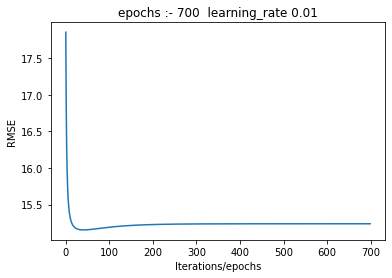

In [51]:
plt.plot(errors_n)
plt.xlabel('Iterations/epochs')
plt.ylabel('RMSE')

plt.title('epochs :- 700  learning_rate 0.01' )
plt.show()

In [53]:
print("RMSE values:", errors_n)

RMSE values: [17.856180296079646, 16.83052835423788, 16.295682723922145, 15.97475967753946, 15.767168273325858, 15.625982354287952, 15.526098611839668, 15.453070735321582, 15.398163422421984, 15.35587807400155, 15.322632083920855, 15.296020464224718, 15.274386121727455, 15.256560601097156, 15.241702654369929, 15.229194950878275, 15.21857642060676, 15.209497019912131, 15.201686927350426, 15.194935208594323, 15.189074803328117, 15.18397180024285, 15.179517664105312, 15.175623524238132, 15.17221592240782, 15.169233607812338, 15.166625093119347, 15.164346770571441, 15.162361445169818, 15.160637181954874, 15.159146392326273, 15.157865104065023, 15.156772373809648, 15.155849810921357, 15.155081189115169, 15.15445212773205, 15.153949828630624, 15.153562857769614, 15.153280962903708, 15.153094920618509, 15.152996407323169, 15.15297788990273, 15.153032532580523, 15.153154117208622, 15.153336974732913, 15.153575925999538, 15.153866230405201, 15.154203541162985, 15.154583866172201, 15.15500353365

In [52]:
# z_val,y_val,w,b,errors=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.01,epochs=50)
# epchs 50 
# learning rate 0.02 - 1
final_error = []
learningRates=[]

for i in range(2, 66):
    learningRate = (i)/100
    z_val,y_val_arr,w,b,errors=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate = learningRate,epochs=400)
    final_error.append(errors[-1])
    learningRates.append(learningRate)

plt.plot(learningRates,final_error)  
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.title('Learning Rate vs RMSE')
plt.show()

KeyboardInterrupt: 

#### Optimal learning rate would be at 0.1 to 0.2

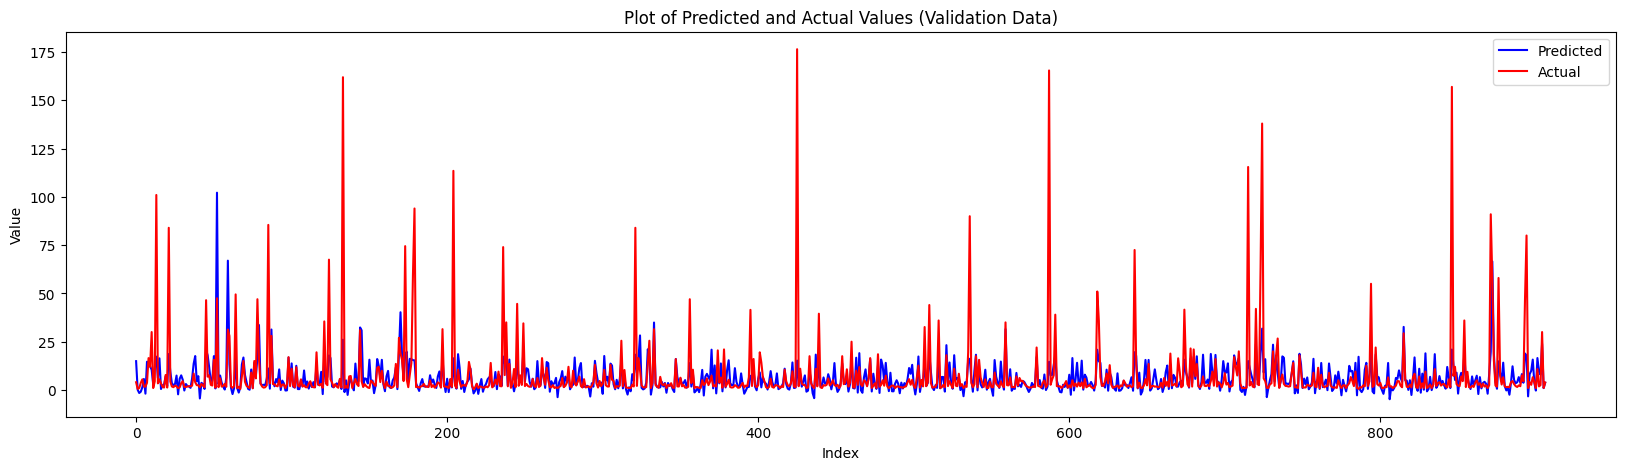

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(z_val[0], label='Predicted', color='blue')
plt.plot(y_val_arr[0], label='Actual', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Predicted and Actual Values (Validation Data)')
plt.legend()
plt.show()

In [21]:
len(y_val)

907

In [56]:
from sklearn import linear_model

In [57]:
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train,y_train)
prediction = linear_regression.predict(X_val)


In [58]:
prediction.shape

(907,)

In [59]:
MAE_val_with_sklearn = (1/len(y_val))*np.sum(np.abs(prediction-y_val.T))

In [60]:
MAE_val_with_sklearn

5.60211245581544

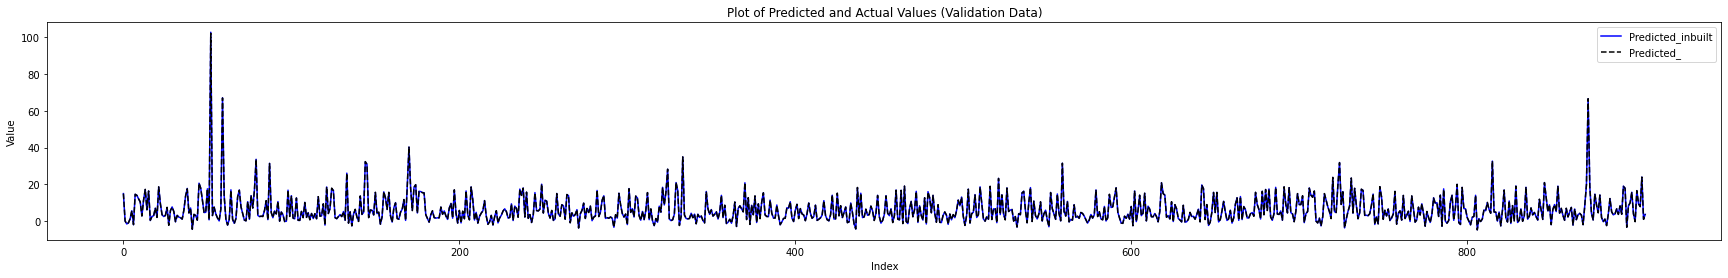

In [61]:
plt.figure(figsize=(30, 4))
plt.plot(prediction, label='Predicted_inbuilt', color='blue')
plt.plot(z_val[0], label='Predicted_', color='black',linestyle='--')
# plt.plot(y_val_arr[0], label='Actual', color='red')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Predicted and Actual Values (Validation Data)')
plt.legend()
plt.show()

In [62]:
z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=400,reg_penalty="L1",penalty_factor=0.1)
z_val,y_val_arr,w,b,errors_l2=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=400,reg_penalty="L2",penalty_factor=0.1)
z_val,y_val_arr,w,b,errors_n=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=400)

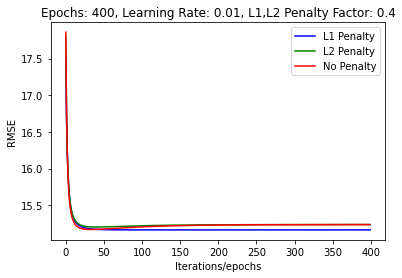

In [63]:
plt.plot(errors_l1, label='L1 Penalty', color='blue')
plt.plot(errors_l2, label='L2 Penalty', color='green')
plt.plot(errors_n, label='No Penalty', color='red')

plt.xlabel('Iterations/epochs')
plt.title('Epochs: 400, Learning Rate: 0.01, L1,L2 Penalty Factor: 0.4')
plt.ylabel('RMSE')

plt.legend()
plt.show()

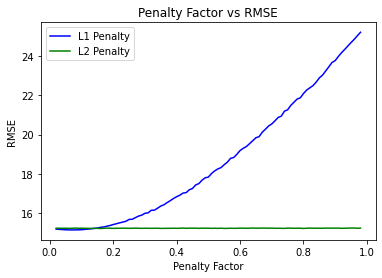

In [65]:
error_reg_l1 = []
error_reg_l2 = []
penalty_list=[]
for i in range(2, 99):
    penalty = (i)/100
    z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.5,epochs=100,reg_penalty="L1",penalty_factor=penalty)
    z_val,y_val_arr,w,b,errors_l2=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.5,epochs=100,reg_penalty="L2",penalty_factor=penalty)
    error_reg_l1.append(errors_l1[-1])
    error_reg_l2.append(errors_l2[-1])
    penalty_list.append(penalty)
plt.plot(penalty_list,error_reg_l1,label='L1 Penalty', color='blue')
plt.plot(penalty_list,error_reg_l2,label='L2 Penalty', color='green')
plt.title('Penalty Factor vs RMSE')
plt.xlabel('Penalty Factor')
plt.ylabel('RMSE')

plt.legend()
plt.show()


In [66]:
print(error_reg_l1)

[15.193652464707677, 15.180164451552665, 15.170015772050997, 15.159453214611755, 15.154535394586778, 15.152081689372533, 15.15450548106394, 15.156355245504258, 15.163270530724272, 15.178134695947868, 15.193722727804078, 15.20983403210708, 15.22996120936417, 15.24524046354317, 15.284289267807297, 15.301428947837675, 15.34117076280424, 15.377144658441374, 15.425112350230572, 15.466254588645768, 15.510819758106777, 15.548737727343854, 15.59213372704025, 15.684418828350024, 15.694533580523068, 15.776625197483565, 15.856505798245848, 15.903761575795572, 15.996994989115317, 16.019900455586217, 16.151176014439493, 16.156027527446838, 16.258653610203414, 16.36591935869652, 16.431668619815074, 16.54155734619399, 16.639949669415333, 16.75067098049373, 16.841909296919212, 16.91615620798356, 17.024373970283783, 17.048614908102696, 17.193132627711424, 17.258982231099335, 17.438983767317236, 17.506844422808445, 17.68015450192387, 17.80325460802926, 17.8383871665167, 18.02041649507938, 18.15369175639

In [67]:
print(error_reg_l2)

[15.238453603144393, 15.23780910036913, 15.234873976739063, 15.236592565112407, 15.231359133225318, 15.234912843723848, 15.246013810112816, 15.235763670628504, 15.237493580879619, 15.233364930751431, 15.23208519471819, 15.229634684254219, 15.22993335873341, 15.23235438979129, 15.225535295835936, 15.234764967795785, 15.242009733032948, 15.238731744742887, 15.230719286893203, 15.236281678056692, 15.235376629225117, 15.242081920714114, 15.238137260807546, 15.234104013766384, 15.235822603127696, 15.242659998134702, 15.236846330102676, 15.233058499755238, 15.237657166573332, 15.234284801839367, 15.234661778421524, 15.235725650684701, 15.237460471090666, 15.228790922175572, 15.230318900357204, 15.233818049679648, 15.234006871814763, 15.237696475676618, 15.233640046106773, 15.23619782885971, 15.246490633024813, 15.234292246086934, 15.241520794848423, 15.240793100617665, 15.241238888297975, 15.231967255371243, 15.241568286118447, 15.238857782056533, 15.239447842773222, 15.231855867840336, 15.2

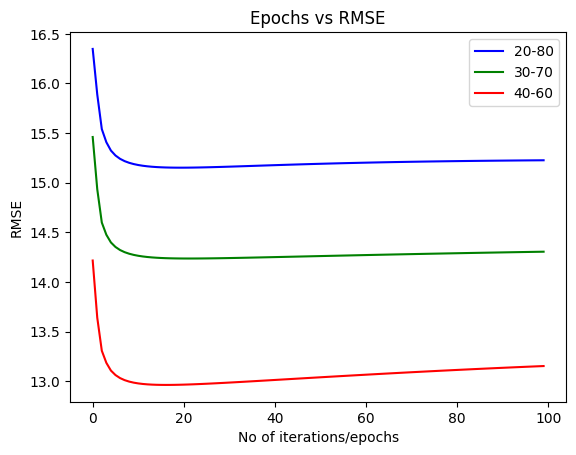

In [31]:
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.2, random_state=5)
z_val,y_val_arr,w,b,errors_80=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100)
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.3, random_state=5)
z_val,y_val_arr,w,b,errors_70=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100)
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.4, random_state=5)
z_val,y_val_arr,w,b,errors_60=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100)
plt.plot(errors_80, label='20-80', color='blue')
plt.plot(errors_70, label='30-70', color='green')
plt.plot(errors_60, label='40-60', color='red')
plt.ylabel('RMSE')
plt.xlabel('No of iterations/epochs')
plt.title('Epochs vs RMSE')
plt.legend()
plt.show()

##### good split could be 40-60
##### epochs could be 200
##### L1 penalty factor doesnt affect

In [32]:
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.4, random_state=5)
z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.1,epochs=100,reg_penalty="L1",penalty_factor=0.1)
print(w)

[[ 0.43691259 -0.66484834 -4.5239626  -0.15648722 -0.36823622  0.4671349
   0.39506398  0.30768456  2.61482742  0.52657188  3.08734309  2.37300909
   0.40798544  0.28299791  0.45298923  0.39720646  0.47041145 -0.13527143
   0.43020062]]


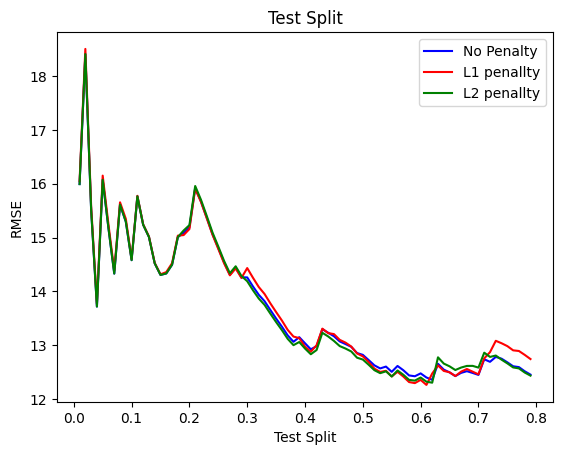

In [33]:
error_split = []
error_split_l1=[]
error_split_l2=[]
split_list=[]
for i in range(1, 80):
    split= (i)/100
    X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=split, random_state=5)
    z_val,y_val_arr,w,b,errors_norm=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=100)
    z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=100,reg_penalty="L1",penalty_factor=0.1)
    z_val,y_val_arr,w,b,errors_l2=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=100,reg_penalty="L2",penalty_factor=0.1)
    error_split.append(errors_norm[-1])
    error_split_l1.append(errors_l1[-1])
    error_split_l2.append(errors_l2[-1])
    split_list.append(split)
plt.plot(split_list,error_split,label='No Penalty', color='blue')
plt.plot(split_list,error_split_l1,label='L1 penallty',color='red')
plt.plot(split_list,error_split_l2,label='L2 penallty',color='green')
plt.xlabel('Test Split')
plt.ylabel('RMSE')
plt.title('Test Split')
plt.legend()
plt.show()


In [101]:
def power_iteration(A, num_iterations=1000):
    n = A.shape[0]
    b_k = np.random.rand(n)  # initial guess for the eigenvector

    for _ in range(num_iterations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # re normalize the vector
        b_k = b_k1 / b_k1_norm

    # calculate the eigenvalue
    eigenvalue = np.dot(np.dot(b_k, A), b_k) / np.dot(b_k, b_k)

    return eigenvalue, b_k

def eig(A, num_iterations=1000):
    eigenvalues = []
    eigenvectors = []

    # Repeat the power iteration for each eigenvalue
    for _ in range(A.shape[0]):
        eigenvalue, eigenvector = power_iteration(A, num_iterations)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)

        # Deflate matrix A
        A = A - eigenvalue * np.outer(eigenvector, eigenvector)

    return np.array(eigenvalues), np.array(eigenvectors)
class MyPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components   
        
    def fit(self, X):
        # Standardize data 
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean) / self.scale
        
        # Eigendecomposition of covariance matrix       
        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = eig(cov_mat) 
        
        # Adjusting the eigenvectors that are largest in absolute value to be positive    
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T
       
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = eig_vecs_sorted[:self.n_components,:]
        
        # Explained variance ratio
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]
        
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)
        
        return X_proj
    

# ---------------------------------------------------------
my_pca = MyPCA(n_components = 5).fit(X)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

X_proj = my_pca.transform(X)
print('Transformed data shape from scratch:', X_proj.shape)


Components:
 [[-0.3132332  -0.04777536  0.3074178  -0.07632103 -0.23180745 -0.22098557
   0.0543629   0.28140207  0.01893794  0.11910365 -0.06286327 -0.11915479
  -0.11790899 -0.44105269 -0.19975819  0.57021454  0.01643036  0.09010106
  -0.07662098]
 [ 0.12322022  0.07519594 -0.41850386  0.11672721  0.29353414  0.16662684
  -0.29584669 -0.12265185 -0.33322264 -0.08530651  0.25980804 -0.1040762
   0.24801857 -0.12258872 -0.15346783  0.50284574  0.07897444  0.13440648
   0.03636027]
 [-0.43892388  0.10208638  0.09239219  0.01721165 -0.14278068  0.10946116
   0.08116717  0.05270144  0.0906418  -0.09512544  0.15286885  0.07225634
   0.32898454  0.39853212  0.01448866 -0.00462513  0.17066077  0.63567939
   0.07190125]
 [ 0.36695169 -0.13949296  0.03432085 -0.17501746  0.17230238 -0.06701789
  -0.06863275 -0.12100367 -0.07759953  0.2188694  -0.45307857  0.34406474
  -0.23344091 -0.00636944 -0.0477062   0.076293    0.10943205  0.55529626
  -0.19781593]
 [-0.18156244  0.2804536  -0.19421899  0

In [35]:
X_train, X_val, y_train, y_val = train_test_split_custom(X_proj, y, test_size=0.4, random_state=5)
z_val,y_val_arr,w,b,errors_norm=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=200)


In [36]:
my_pca = MyPCA(n_components = 5).fit(X)
X_proj = my_pca.transform(X)
X_train, X_val, y_train, y_val = train_test_split_custom(X_proj, y, test_size=0.4, random_state=5)
z_val,y_val_arr,w,b,errors_norm=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=200)


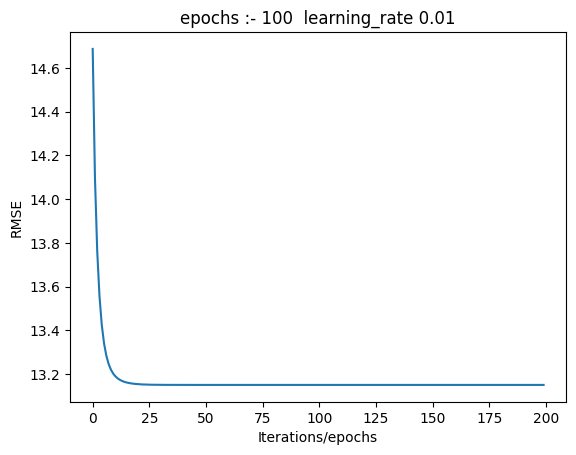

In [37]:
plt.plot(errors_norm)
plt.xlabel('Iterations/epochs')
plt.ylabel('RMSE')

plt.title('epochs :- 100  learning_rate 0.01' )
plt.show()

##### lets take upto 5 features from pca and do the polynomial analysis for it 

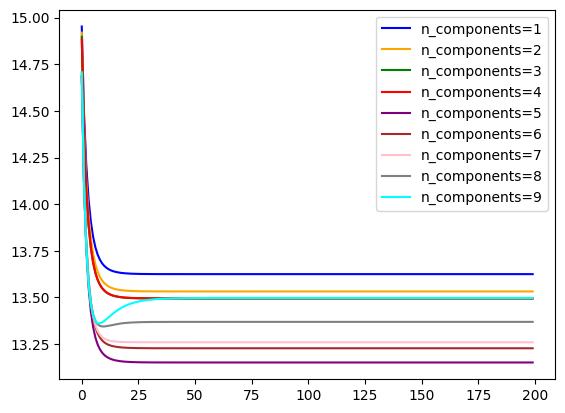

In [38]:
errors_list = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan']

for i in range(1, 10):
    my_pca = MyPCA(n_components=i).fit(X)
    X_proj = my_pca.transform(X)
    X_train, X_val, y_train, y_val = train_test_split_custom(X_proj, y, test_size=0.4, random_state=5)
    z_val, y_val_arr, w, b, errors_norm = linear_regresssion_model(X_train, y_train, X_val, y_val, learning_rate=0.2, epochs=200)
    plt.plot(errors_norm, label=f'n_components={i}', color=colors[i-1])

plt.legend()
plt.show()


In [39]:
class SVR:
    def __init__(self, epsilon=0.5):
        self.epsilon = epsilon
        self.W = None
        self.intercept_ = None

    def _compute_loss(self, X, y):
        y_pred = np.dot(X, self.W) + self.intercept_
        error = np.maximum(0, np.abs(y_pred - y) - self.epsilon)
        loss = np.linalg.norm(self.W) / 2 + np.mean(error)
        return loss

    def fit(self, X, y, epochs=100, learning_rate=0.01):
        feature_len = X.shape[-1] if len(X.shape) > 1 else 1
        
        self.W = np.random.randn(feature_len)
        self.intercept_ = np.random.randn(1)

        for epoch in range(epochs):
            loss = self._compute_loss(X, y)
            # print("{}/{}: loss: {}".format(epoch + 1, epochs, loss))

            # Compute gradients
            y_pred = np.dot(X, self.W) + self.intercept_
            error = y_pred - y
            
            grad_W = np.dot(X.T, np.where(np.abs(error) > self.epsilon, np.sign(error), 0))
            grad_b = np.sum(np.where(np.abs(error) > self.epsilon, np.sign(error), 0))
            # Update weights
            self.W = self.W - learning_rate * grad_W / len(y)
            self.intercept_ -= learning_rate * grad_b / len(y)
        
        return self

    def predict(self, X):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        y_pred = np.dot(X, self.W) + self.intercept_
        return y_pred

In [16]:
def train_test_split_custom_with_array(X, y, test_size=0.2, random_state=None):
    # Set seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle indices
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    # Determine split index
    split_index = int((1 - test_size) * num_samples)
    
    # Split data
    X_train, X_test = X.iloc[indices[:split_index]].values, X.iloc[indices[split_index:]].values
    y_train, y_test = y.iloc[indices[:split_index]].values, y.iloc[indices[split_index:]].values
    
    return X_train, X_test, y_train, y_test


In [21]:
def compute_rmse(y_test,y_pred):
    rmse = 0
    for i in range(len(y_test)):
        rmse += (y_pred[i] - y_test[i])**2
    rmse = (rmse / len(y_test))**0.5
    return rmse 

In [42]:
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)

In [43]:
model=SVR(epsilon=0.5)
model.fit(X_train,y_train,epochs=100,learning_rate=0.01)
y_pred=model.predict(X_test)
print(compute_rmse(y_test,y_pred))

13.458538352549787


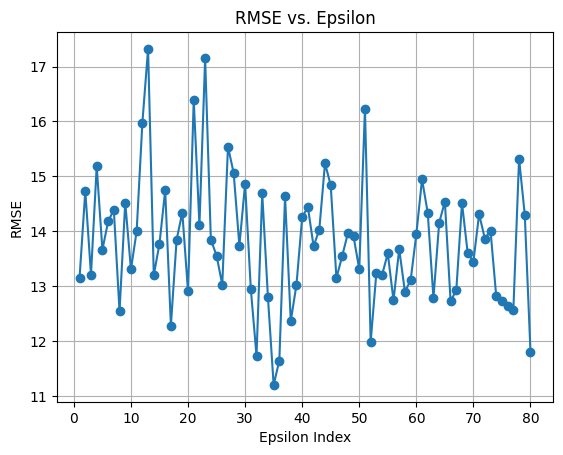

In [44]:
error_epsilon = []
d_epsilon = 0.01
while d_epsilon <= 0.8:
    model = SVR(epsilon=d_epsilon)
    model.fit(X_train, y_train, epochs=100, learning_rate=0.01)
    y_pred = model.predict(X_test)
    error_epsilon.append(compute_rmse(y_test, y_pred))
    d_epsilon = round(d_epsilon + 0.01, 2)  # Increment by 0.01 and round to 2 decimal places

# Now error_epsilon will contain the RMSE values for different values of epsilon
plt.plot(range(1, len(error_epsilon) + 1), error_epsilon, marker='o', linestyle='-')
plt.title('RMSE vs. Epsilon')
plt.xlabel('Epsilon Index')
plt.ylabel('RMSE')
plt.xticks(range(0, len(error_epsilon) + 1, 10))  # Adjust x-axis ticks for better readability
plt.grid(True)
plt.show()

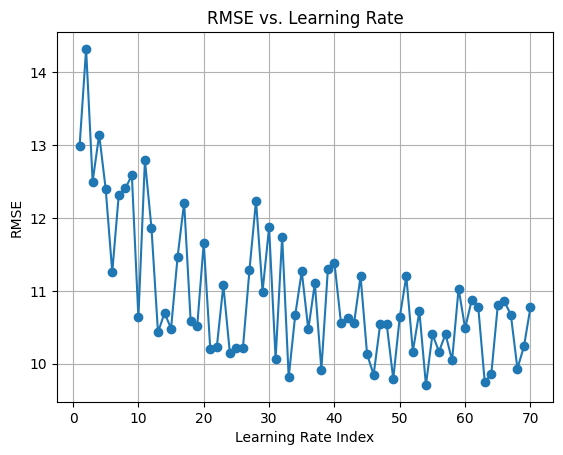

In [45]:
error_lr = []
d_lr = 0.01
while d_lr <= 0.7:
    model = SVR(epsilon=0.5)
    model.fit(X_train, y_train, epochs=100, learning_rate=d_lr)
    y_pred = model.predict(X_test)
    error_lr.append(compute_rmse(y_test, y_pred))
    d_lr = round(d_lr + 0.01, 2)  

plt.plot(range(1, len(error_lr) + 1), error_lr, marker='o', linestyle='-')
plt.title('RMSE vs. Learning Rate')
plt.xlabel('Learning Rate Index')
plt.ylabel('RMSE')
plt.xticks(range(0, len(error_lr) + 1, 10))  # Adjust x-axis ticks for better readability
plt.grid(True)
plt.show()



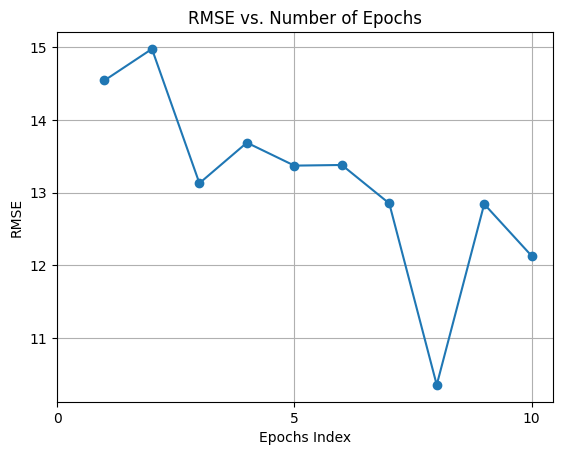

In [46]:
error_epoch = []
d_epoch = 50
while d_epoch <= 500:
    model = SVR(epsilon=0.5)
    model.fit(X_train, y_train, epochs=d_epoch, learning_rate=0.01)
    y_pred = model.predict(X_test)
    error_epoch.append(compute_rmse(y_test, y_pred))
    d_epoch = round(d_epoch + 50, 2)  # Increment by 0.01 and round to 2 decimal places

# Now error_epsilon will contain the RMSE values for different values of epsilon
import matplotlib.pyplot as plt

# Your code to calculate error_epoch

# Plotting
plt.plot(range(1, len(error_epoch) + 1), error_epoch, marker='o', linestyle='-')
plt.title('RMSE vs. Number of Epochs')
plt.xlabel('Epochs Index')
plt.ylabel('RMSE')
plt.xticks(range(0, len(error_epoch) + 1, 5))  # Adjust x-axis ticks for better readability
plt.grid(True)
plt.show()



##### with pca 

In [47]:
rmse_list = []

for n_features in range(1, 11):
    my_pca = MyPCA(n_components=n_features).fit(X)
    X_proj = my_pca.transform(X)
    X_train, X_val, y_train, y_val = train_test_split_custom_with_array(X_proj, y, test_size=0.4, random_state=5)
    model = SVR(epsilon=0.5)
    model.fit(X_train, y_train, epochs=250, learning_rate=0.20)
    y_pred = model.predict(X_val)
    rmse = compute_rmse(y_val, y_pred)
    rmse_list.append(rmse)

print(rmse_list)


[14.717519968289784, 14.722243132358987, 14.615455659785626, 14.612003660903506, 14.263455416637294, 14.24905491078886, 14.224138511813651, 14.08055294181606, 14.0966694622208, 14.063320535273332]


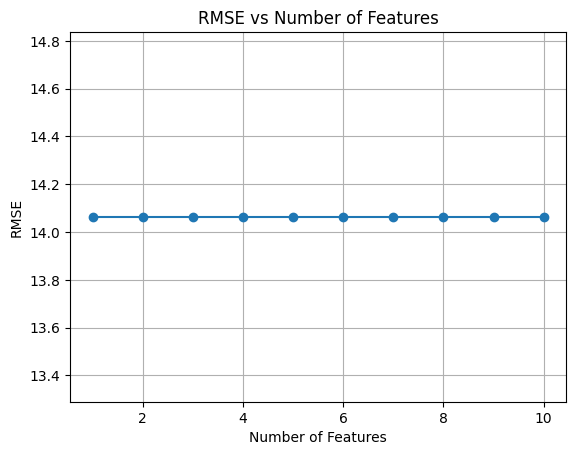

In [62]:
n_features = list(range(1, 11))

# Plot RMSE values
plt.plot(n_features, rmse_list, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features')
plt.grid(True)
plt.show()

In [13]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [14]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.column_names = None  # To store column names
    
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, columns, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print(columns[tree.feature_index], "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(columns, tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(columns, tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        self.column_names = columns
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions


In [50]:
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)

In [51]:
X_train

array([[ 0.77937146,  0.77486098,  0.26762875, ..., -0.33063622,
        -0.09897076, -0.3084236 ],
       [-0.51752868,  0.330692  ,  0.35202161, ..., -0.33063622,
        -0.09897076, -0.3084236 ],
       [ 0.59410001, -0.11347697, -0.28092486, ..., -0.33063622,
        -0.09897076, -0.3084236 ],
       ...,
       [-0.33225723,  1.44111443,  0.90057522, ..., -0.33063622,
        -0.09897076, -0.3084236 ],
       [ 0.40882856, -0.11347697,  0.85837879, ..., -0.33063622,
        -0.09897076, -0.3084236 ],
       [-0.70280013, -1.00181491,  0.05664659, ..., -0.33063622,
        -0.09897076, -0.3084236 ]])

In [26]:
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
y_train_reshaped =y_train.reshape(-1,1)
columns=list(X.columns)

regressor.fit(X_train,y_train_reshaped)
regressor.print_tree(columns)

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:15.468080357142856
        right:32.57
    right:232.0
  right:N_min <= 1.81675108835312 ? 767.2583391269714
    left:pH_min <= -0.19203136394862388 ? 439.70330853052815
        left:71.50161290322582
        right:28.5525
    right:Temp_max <= 0.3306920035303356 ? 3694.6680555555554
        left:172.1
        right:9.0
 right:DisO2_min <= -0.6606927411415696 ? 5.141082023702602
  left:Conductivity_max <= -0.07045011793512032 ? 13.120416765322801
    left:Conductivity_max <= -0.16827920883106787 ? 3.3629215438182456
        left:4.922131147540983
        right:8.592477876106194
    right:N_min <= 9.25220247579171 ? 13.751912040580407
        left:13.61156069364162
        right:48.5
  right:Conductivity_min <= 0.0514071737073266

In [27]:
y_pred=regressor.predict(X_test)
compute_rmse(y_test,y_pred)

10.614696799239903

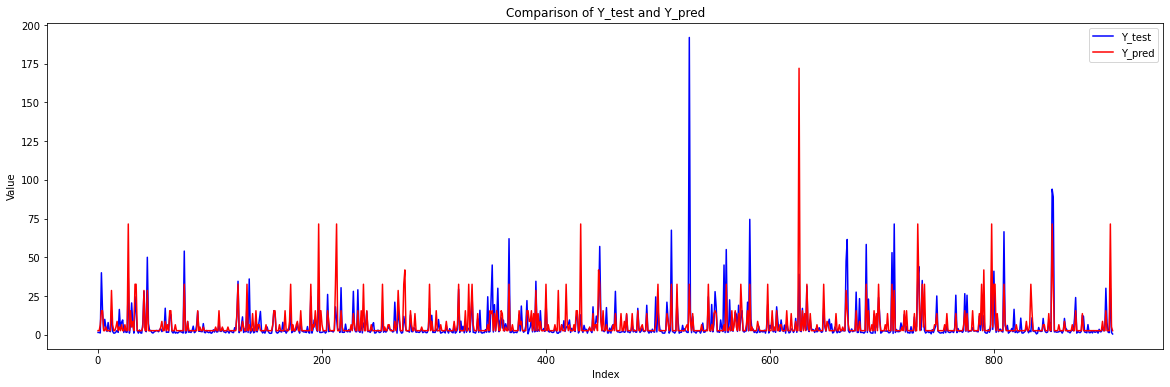

In [28]:
import matplotlib.pyplot as plt


# Plot Y_test and Y_pred as lines
plt.figure(figsize=(20, 6))
plt.plot(y_test, label='Y_test', color='blue')
plt.plot(y_pred, label='Y_pred', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Y_test and Y_pred')
plt.legend()
plt.show()


In [54]:
errors_mse=[]
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)
for i in range(2,10):
    regressor = DecisionTreeRegressor(min_samples_split=i, max_depth=3)
    y_train_reshaped =y_train.reshape(-1,1)
    columns=list(X.columns)
    regressor.fit(X_train,y_train_reshaped)
    regressor.print_tree(columns)
    y_pred=regressor.predict(X_test)
    errors_mse.append(compute_rmse(y_test,y_pred))
    print(i)


DisO2_min <= -1.799996387223181 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826506034 ? 195.7387311395379
  left:Fecal_Col_min <= 24.091200012568123 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809221 ? 70.16270854380849
        left:15.468080357142856
        right:32.57
    right:232.0
  right:N_min <= 1.816751088353143 ? 767.2583391269714
    left:pH_min <= -0.19203136394865036 ? 439.70330853052815
        left:71.50161290322582
        right:28.5525
    right:Temp_max <= 0.3306920035303314 ? 3694.6680555555554
        left:172.1
        right:9.0
 right:DisO2_min <= -0.660692741141594 ? 5.141082023702602
  left:Conductivity_max <= -0.07045011793511989 ? 13.120416765322801
    left:Conductivity_max <= -0.16827920883106745 ? 3.3629215438182456
        left:4.922131147540983
        right:8.592477876106194
    right:N_min <= 9.252202475791773 ? 13.751912040580407
        left:13.61156069364162
        right:48.5
  right:Conductivity_min <= 0.051407173707327

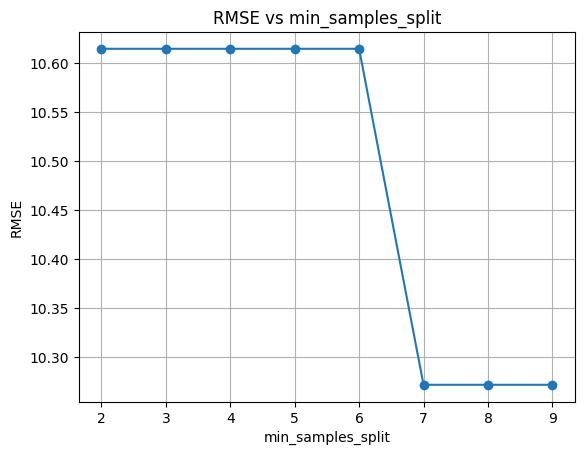

In [55]:
# Plotting the error_mse
plt.plot(range(2, 10), errors_mse, marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.title('RMSE vs min_samples_split')
plt.grid(True)
plt.show()

In [56]:
errors_mse=[]
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)
for i in range(2,7):
    regressor = DecisionTreeRegressor(min_samples_split=7, max_depth=i)
    y_train_reshaped =y_train.reshape(-1,1)
    columns=list(X.columns)
    regressor.fit(X_train,y_train_reshaped)
    regressor.print_tree(columns)
    y_pred=regressor.predict(X_test)
    errors_mse.append(compute_rmse(y_test,y_pred))
    print(i)

DisO2_min <= -1.799996387223181 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826506034 ? 195.7387311395379
  left:Fecal_Col_min <= 24.091200012568123 ? 117.26376146042634
    left:22.299678284182306
    right:232.0
  right:N_min <= 1.816751088353143 ? 767.2583391269714
    left:54.65882352941177
    right:144.91666666666666
 right:DisO2_min <= -0.660692741141594 ? 5.141082023702602
  left:Conductivity_max <= -0.07045011793511989 ? 13.120416765322801
    left:6.687021276595744
    right:14.010285714285715
  right:Conductivity_min <= 0.05140717370732703 ? 1.5713497469637652
    left:2.6151314741035856
    right:6.804963898916967
2
DisO2_min <= -1.799996387223181 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826506034 ? 195.7387311395379
  left:Fecal_Col_min <= 24.091200012568123 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809221 ? 70.16270854380849
        left:15.468080357142856
        right:32.57
    right:232.0
  right:N_min <= 1.816751088353143 

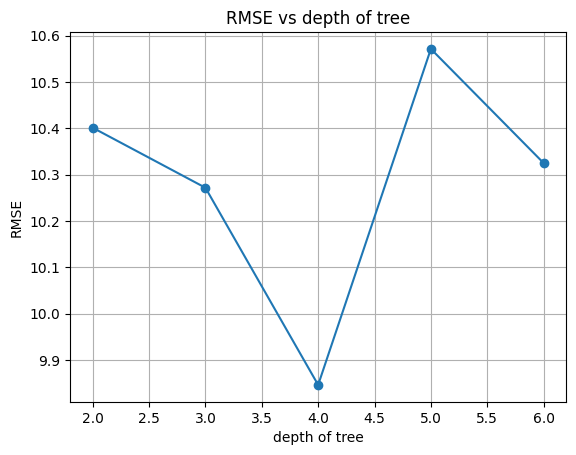

In [57]:
# Plotting the error_mse
plt.plot(range(2, 7), errors_mse, marker='o')
plt.xlabel('depth of tree')
plt.ylabel('RMSE')
plt.title('RMSE vs depth of tree')
plt.grid(True)
plt.show()

In [58]:
rmse_list = []

for n_features in range(1, 11):
    my_pca = MyPCA(n_components=n_features).fit(X)
    X_proj = my_pca.transform(X)
    X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X_proj, y, test_size=0.2, random_state=24)
    regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
    y_train_reshaped =y_train.reshape(-1,1)
    columns=list(X.columns)
    regressor.fit(X_train,y_train_reshaped)
    regressor.print_tree(columns)
    y_pred=regressor.predict(X_test)
    errors_mse.append(compute_rmse(y_test,y_pred))
    rmse_list.append(rmse)

print(rmse_list)

Temp_min <= -1.4263691968466314 ? 41.458200461513655
 left:Temp_min <= -3.4502099855095367 ? 49.58047789884665
  left:Temp_min <= -3.456809249464148 ? 246.910515095876
    left:Temp_min <= -4.270122913924555 ? 109.82240356542138
        left:45.546938775510206
        right:24.562962962962963
    right:149.5
  right:Temp_min <= -1.4591395392437732 ? 2.9844617627900902
    left:Temp_min <= -2.0486267377539784 ? 4.623258359791635
        left:18.391019830028327
        right:13.97677130044843
    right:Temp_min <= -1.4580836177472636 ? 845.2224013157894
        left:153.0
        right:19.605263157894736
 right:Temp_min <= -0.9340292218252387 ? 3.2564633159317395
  left:Temp_min <= -0.9592446184714392 ? 1.7587337835041978
    left:Temp_min <= -1.0490445460280815 ? 2.171141891392665
        left:9.653268292682927
        right:5.942
    right:Temp_min <= -0.9576279200853258 ? 160.47240786129268
        left:66.5
        right:11.197058823529412
  right:Temp_min <= 0.647008401343089 ? 0.95

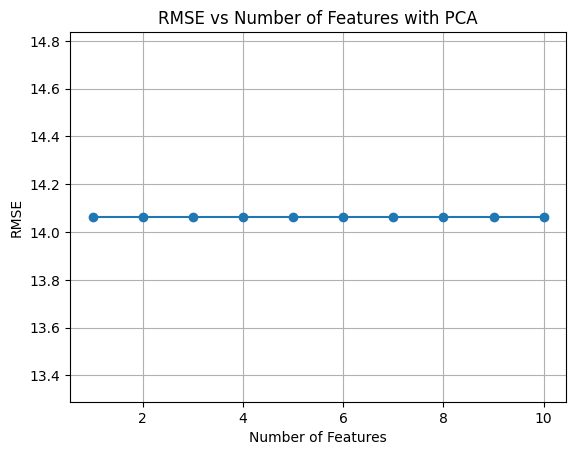

In [61]:
n_features = list(range(1, 11))

# Plot RMSE values
plt.plot(n_features, rmse_list, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features with PCA')
plt.grid(True)
plt.show()


In [17]:
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)
regressor = DecisionTreeRegressor(min_samples_split=7, max_depth=4)
y_train_reshaped =y_train.reshape(-1,1)
columns=list(X.columns)

regressor.fit(X_train,y_train_reshaped)
regressor.print_tree(columns)

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:24.545833333333338
                right:12.146951219512195
        right:Conductivity_max <= -0.1214610010451501 ? 83.94776002506256
                left:16.034285714285716
                right:37.64675438596491
    right:232.0
  right:N_min <= 1.81675108835312 ? 767.2583391269714
    left:pH_min <= -0.19203136394862388 ? 439.70330853052815
        left:Total_Coli_max <= 4.150831592703576 ? 529.1864516996186
                left:67.30166666666666
                right:197.5
        right:Temp_min <= 1.149914355204374 ? 162.11655625000003
                left:24.30833333333333
                right:66.75
    right:144.91666666666666
 right:DisO2_min <= -

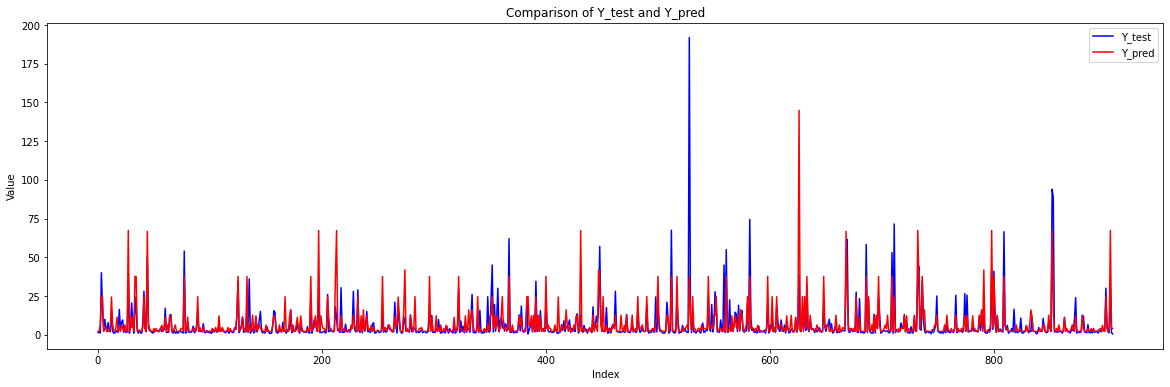

In [23]:
import matplotlib.pyplot as plt


# Plot Y_test and Y_pred as lines
plt.figure(figsize=(20, 6))
plt.plot(y_test, label='Y_test', color='blue')
plt.plot(y_pred, label='Y_pred', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Y_test and Y_pred')
plt.legend()
plt.show()


In [22]:
y_pred=regressor.predict(X_test)
compute_rmse(y_test,y_pred)

9.846037224281773

In [25]:
errors_mse = []
min_samples_splits = range(2, 8)
max_depths = range(2, 8)

for min_samples_split in min_samples_splits:
    for max_depth in max_depths:
        X_train, X_test, y_train, y_test = train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)
        regressor = DecisionTreeRegressor(min_samples_split=min_samples_split, max_depth=max_depth)
        y_train_reshaped = y_train.reshape(-1, 1)
        columns = list(X.columns)
        regressor.fit(X_train, y_train_reshaped)
        regressor.print_tree(columns)
        y_pred = regressor.predict(X_test)
        rmse = compute_rmse(y_test, y_pred)
        errors_mse.append((min_samples_split, max_depth, rmse))

# Print RMSE for each value of min_samples_split and max_depth
for min_samples_split, max_depth, rmse in errors_mse:
    print(f"min_samples_split={min_samples_split}, max_depth={max_depth}, RMSE={rmse}")


DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:22.299678284182306
    right:232.0
  right:N_min <= 1.81675108835312 ? 767.2583391269714
    left:54.65882352941177
    right:144.91666666666666
 right:DisO2_min <= -0.6606927411415696 ? 5.141082023702602
  left:Conductivity_max <= -0.07045011793512032 ? 13.120416765322801
    left:6.687021276595744
    right:14.010285714285715
  right:Conductivity_min <= 0.05140717370732667 ? 1.5713497469637652
    left:2.6151314741035856
    right:6.804963898916967
DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:15.468080357142856
        right:32.57
    right:232.0
  right:N_min <= 1.81675108835312 ? 7

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:31.849999999999998
                                                                right:101.0
                                right:Conductivity_min <= 0.5793558138122199 ? 35.78208027623174
                                                                left:19.040243902439027
                                                                right:33.333333333333336
                right:Total_Coli_min <= -0.04571790034549949 ? 22.259897726904384
      

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:Temp_max <= -0.5576459408811288 ? 44.651250000000005
                                                                                                                                left:41.3
                                                                                                                                right:27.125
                                                                right:101.0
                                right:Conductivit

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:22.299678284182306
    right:232.0
  right:N_min <= 1.81675108835312 ? 767.2583391269714
    left:54.65882352941177
    right:144.91666666666666
 right:DisO2_min <= -0.6606927411415696 ? 5.141082023702602
  left:Conductivity_max <= -0.07045011793512032 ? 13.120416765322801
    left:6.687021276595744
    right:14.010285714285715
  right:Conductivity_min <= 0.05140717370732667 ? 1.5713497469637652
    left:2.6151314741035856
    right:6.804963898916967
DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:15.468080357142856
        right:32.57
    right:232.0
  right:N_min <= 1.81675108835312 ? 7

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:31.849999999999998
                                                                right:101.0
                                right:Conductivity_min <= 0.5793558138122199 ? 35.78208027623174
                                                                left:19.040243902439027
                                                                right:33.333333333333336
                right:Total_Coli_min <= -0.04571790034549949 ? 22.259897726904384
      

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:Temp_max <= -0.5576459408811288 ? 44.651250000000005
                                                                                                                                left:41.3
                                                                                                                                right:27.125
                                                                right:101.0
                                right:Conductivit

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:22.299678284182306
    right:232.0
  right:N_min <= 1.81675108835312 ? 767.2583391269714
    left:54.65882352941177
    right:144.91666666666666
 right:DisO2_min <= -0.6606927411415696 ? 5.141082023702602
  left:Conductivity_max <= -0.07045011793512032 ? 13.120416765322801
    left:6.687021276595744
    right:14.010285714285715
  right:Conductivity_min <= 0.05140717370732667 ? 1.5713497469637652
    left:2.6151314741035856
    right:6.804963898916967
DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:15.468080357142856
        right:32.57
    right:232.0
  right:N_min <= 1.81675108835312 ? 7

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:31.849999999999998
                                                                right:101.0
                                right:Conductivity_min <= 0.5793558138122199 ? 35.78208027623174
                                                                left:19.040243902439027
                                                                right:33.333333333333336
                right:Total_Coli_min <= -0.04571790034549949 ? 22.259897726904384
      

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:Temp_max <= -0.5576459408811288 ? 44.651250000000005
                                                                                                                                left:41.3
                                                                                                                                right:27.125
                                                                right:101.0
                                right:Conductivit

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:22.299678284182306
    right:232.0
  right:N_min <= 1.81675108835312 ? 767.2583391269714
    left:54.65882352941177
    right:144.91666666666666
 right:DisO2_min <= -0.6606927411415696 ? 5.141082023702602
  left:Conductivity_max <= -0.07045011793512032 ? 13.120416765322801
    left:6.687021276595744
    right:14.010285714285715
  right:Conductivity_min <= 0.05140717370732667 ? 1.5713497469637652
    left:2.6151314741035856
    right:6.804963898916967
DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:15.468080357142856
        right:32.57
    right:232.0
  right:N_min <= 1.81675108835312 ? 7

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:31.849999999999998
                                                                right:101.0
                                right:Conductivity_min <= 0.5793558138122199 ? 35.78208027623174
                                                                left:19.040243902439027
                                                                right:33.333333333333336
                right:Total_Coli_min <= -0.04571790034549949 ? 22.259897726904384
      

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:Temp_max <= -0.5576459408811288 ? 44.651250000000005
                                                                                                                                left:41.3
                                                                                                                                right:27.125
                                                                right:101.0
                                right:Conductivit

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:22.299678284182306
    right:232.0
  right:N_min <= 1.81675108835312 ? 767.2583391269714
    left:54.65882352941177
    right:144.91666666666666
 right:DisO2_min <= -0.6606927411415696 ? 5.141082023702602
  left:Conductivity_max <= -0.07045011793512032 ? 13.120416765322801
    left:6.687021276595744
    right:14.010285714285715
  right:Conductivity_min <= 0.05140717370732667 ? 1.5713497469637652
    left:2.6151314741035856
    right:6.804963898916967
DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:15.468080357142856
        right:32.57
    right:232.0
  right:N_min <= 1.81675108835312 ? 7

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:31.849999999999998
                                                                right:101.0
                                right:Conductivity_min <= 0.5793558138122199 ? 35.78208027623174
                                                                left:19.040243902439027
                                                                right:33.333333333333336
                right:Total_Coli_min <= -0.04571790034549949 ? 22.259897726904384
      

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:Temp_max <= -0.5576459408811288 ? 44.651250000000005
                                                                                                                                left:41.3
                                                                                                                                right:27.125
                                                                right:101.0
                                right:Conductivit

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:22.299678284182306
    right:232.0
  right:N_min <= 1.81675108835312 ? 767.2583391269714
    left:54.65882352941177
    right:144.91666666666666
 right:DisO2_min <= -0.6606927411415696 ? 5.141082023702602
  left:Conductivity_max <= -0.07045011793512032 ? 13.120416765322801
    left:6.687021276595744
    right:14.010285714285715
  right:Conductivity_min <= 0.05140717370732667 ? 1.5713497469637652
    left:2.6151314741035856
    right:6.804963898916967
DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:15.468080357142856
        right:32.57
    right:232.0
  right:N_min <= 1.81675108835312 ? 7

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:31.849999999999998
                                                                right:101.0
                                right:Conductivity_min <= 0.5793558138122199 ? 35.78208027623174
                                                                left:19.040243902439027
                                                                right:33.333333333333336
                right:Total_Coli_min <= -0.04571790034549949 ? 22.259897726904384
      

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:Temp_max <= -0.11347696867539664 ? 38.99481922918545
                                left:N_max <= 1.909374381930333 ? 585.5170408163266
                                                                left:31.849999999999998
                                                                right:101.0
                                right:Conductivity_min <= 0.5793558138122199 ? 35.78208027623174
                                                                left:Fecal_Col_max <= -0.0391871091771247 ? 22.77995093456775
                                                                                                                                left:21.205

C:\Users\tsriv\AppData\Local\Temp\ipykernel_47016\3381155337.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rmse_matrix[row, col] = rmse


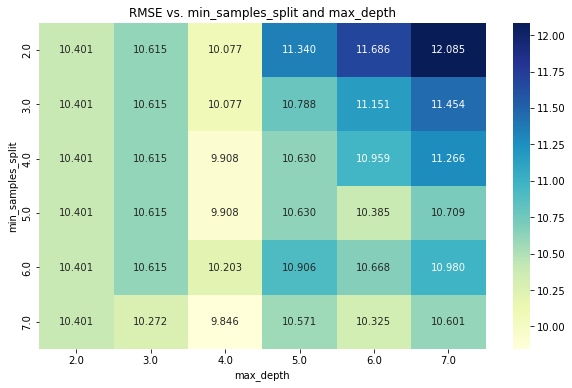

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert errors_mse to a numpy array for easier manipulation
errors_mse_arr = np.array(errors_mse)

# Extract min_samples_split, max_depth, and RMSE from errors_mse_arr
min_samples_splits = np.unique(errors_mse_arr[:, 0])
max_depths = np.unique(errors_mse_arr[:, 1])

# Create a 2D matrix to store RMSE values
rmse_matrix = np.zeros((len(min_samples_splits), len(max_depths)))

# Populate the RMSE matrix
for row, min_samples_split in enumerate(min_samples_splits):
    for col, max_depth in enumerate(max_depths):
        rmse = errors_mse_arr[(errors_mse_arr[:, 0] == min_samples_split) & (errors_mse_arr[:, 1] == max_depth), 2]
        rmse_matrix[row, col] = rmse

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rmse_matrix, annot=True, fmt=".3f", xticklabels=max_depths, yticklabels=min_samples_splits, cmap="YlGnBu")
plt.title("RMSE vs. min_samples_split and max_depth")
plt.xlabel("max_depth")
plt.ylabel("min_samples_split")
plt.show()


In [33]:
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)
regressor = DecisionTreeRegressor(min_samples_split=7, max_depth=4)
y_train_reshaped =y_train.reshape(-1,1)
columns=list(X.columns)

regressor.fit(X_train,y_train_reshaped)
regressor.print_tree(columns)

DisO2_min <= -1.7999963872231546 ? 62.43274749647716
 left:Conductivity_max <= 0.17953814826505987 ? 195.7387311395379
  left:Fecal_Col_min <= 24.09120001256794 ? 117.26376146042634
    left:Fecal_Col_max <= -0.03914599258809224 ? 70.16270854380849
        left:DisO2_min <= -2.0109785439049292 ? 30.148389913439658
                left:24.545833333333338
                right:12.146951219512195
        right:Conductivity_max <= -0.1214610010451501 ? 83.94776002506256
                left:16.034285714285716
                right:37.64675438596491
    right:232.0
  right:N_min <= 1.81675108835312 ? 767.2583391269714
    left:pH_min <= -0.19203136394862388 ? 439.70330853052815
        left:Total_Coli_max <= 4.150831592703576 ? 529.1864516996186
                left:67.30166666666666
                right:197.5
        right:Temp_min <= 1.149914355204374 ? 162.11655625000003
                left:24.30833333333333
                right:66.75
    right:144.91666666666666
 right:DisO2_min <= -

In [34]:
y_pred=regressor.predict(X_test)
compute_rmse(y_test,y_pred)

9.846037224281773

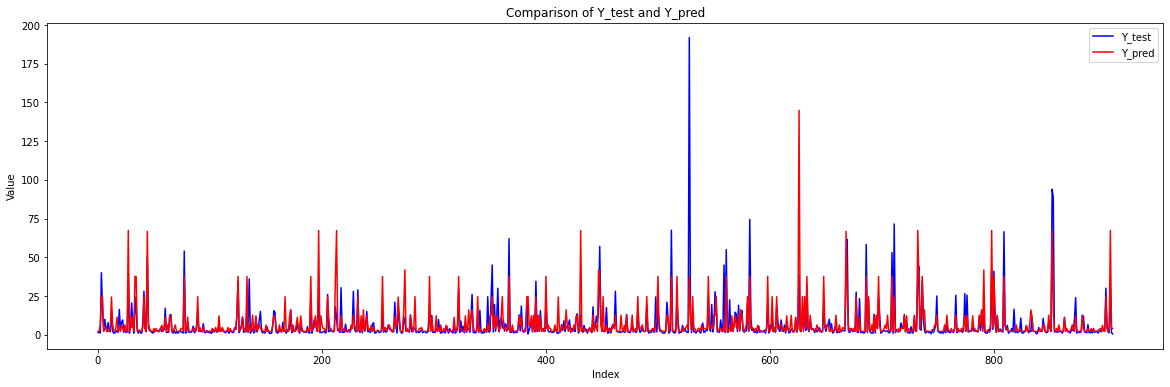

In [36]:
import matplotlib.pyplot as plt


# Plot Y_test and Y_pred as lines
plt.figure(figsize=(20, 6))
plt.plot(y_test, label='Y_test', color='blue')
plt.plot(y_pred, label='Y_pred', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Y_test and Y_pred')
plt.legend()
plt.show()


In [39]:
rmse_list = []

for n_features in range(1, 11):
    my_pca = MyPCA(n_components=n_features).fit(X)
    X_proj = my_pca.transform(X)
    X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X_proj, y, test_size=0.2, random_state=24)
    regressor = DecisionTreeRegressor(min_samples_split=7, max_depth=4)
    y_train_reshaped =y_train.reshape(-1,1)
    columns=list(X.columns)
    regressor.fit(X_train,y_train_reshaped)
    regressor.print_tree(columns)
    y_pred=regressor.predict(X_test)
    errors_mse.append(compute_rmse(y_test,y_pred))
    rmse_list.append(rmse)

print(rmse_list)

Temp_min <= -1.4263691968466456 ? 41.458200461513655
 left:Temp_min <= -3.4502099855095785 ? 49.58047789884665
  left:Temp_min <= -3.4568092494641487 ? 246.910515095876
    left:Temp_min <= -4.270122913924579 ? 109.82240356542138
        left:Temp_min <= -4.326619097945014 ? 409.97819752035593
                left:40.37608695652174
                right:124.83333333333333
        right:Temp_min <= -3.464077867848418 ? 43.35772679038223
                left:23.658490566037738
                right:72.5
    right:149.5
  right:Temp_min <= -1.459139539243773 ? 2.9844617627900902
    left:Temp_min <= -2.0486267377539695 ? 4.623258359791635
        left:Temp_min <= -2.1033843605232025 ? 7.759656206151874
                left:17.745313432835818
                right:30.408333333333335
        right:Temp_min <= -1.6918605912767635 ? 4.016263086148626
                left:12.266046511627906
                right:16.324468085106382
    right:Temp_min <= -1.458083617747272 ? 845.2224013157894
  

Temp_min <= -1.4263691968466454 ? 41.458200461513655
 left:pH_min <= 1.1603111430409723 ? 92.02931558409966
  left:Temp_min <= -4.929165982364457 ? 47.57204747164104
    left:Temp_max <= 2.089037396859964 ? 1455.8456350446431
        left:Temp_min <= -5.665645675479479 ? 1726.5431643282323
                left:132.33333333333334
                right:48.36875
        right:Temp_min <= -7.1978341553608995 ? 14.8996
                left:10.82
                right:3.0999999999999996
    right:Temp_min <= -2.011694786937584 ? 12.398969823138316
        left:Temp_max <= -0.8252609082561615 ? 27.266541392228817
                left:28.09922222222222
                right:15.450619195046437
        right:pH_min <= 1.0145282399737685 ? 16.59973484404938
                left:10.160990099009899
                right:39.6875
  right:DisO2_max <= -9.43518061429845 ? 569.0473593596803
    left:232.0
    right:pH_min <= 1.1609125152499276 ? 243.43947897429985
        left:165.5
        right:DisO2_

KeyboardInterrupt: 